In [6]:
%matplotlib widget

In [1]:
# from ipywidgets import *
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema

import mne

In [2]:
root = mne.datasets.sample.data_path() / "MEG" / "sample"
raw_file = root / "sample_audvis_filt-0-40_raw.fif"
raw = mne.io.read_raw_fif(raw_file, preload=False)

events_file = root / "sample_audvis_filt-0-40_raw-eve.fif"
events = mne.read_events(events_file)

raw.crop(tmax=90)  # in seconds (happens in-place)
# discard events >90 seconds (not strictly necessary, but avoids some warnings)
events = events[events[:, 0] <= raw.last_samp]

Opening raw data file /nethome/costamai/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [3]:
#choose channels
raw.pick(["eeg", "eog"]).load_data()
raw.info

Reading 0 ... 13514  =      0.000 ...    90.001 secs...


<Info | 14 non-empty values
 bads: 1 items (EEG 053)
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 61
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>

In [4]:
#not important - renaming
channel_renaming_dict = {name: name.replace(" 0", "").lower() for name in raw.ch_names}
_ = raw.rename_channels(channel_renaming_dict)  # happens in-place

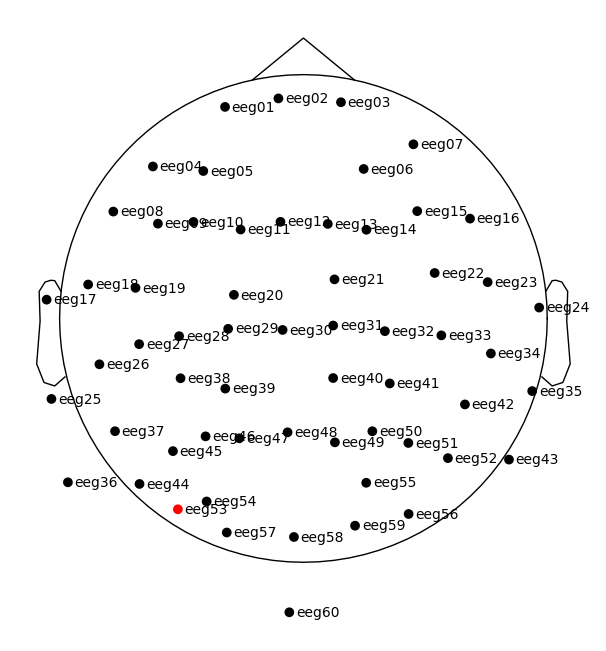

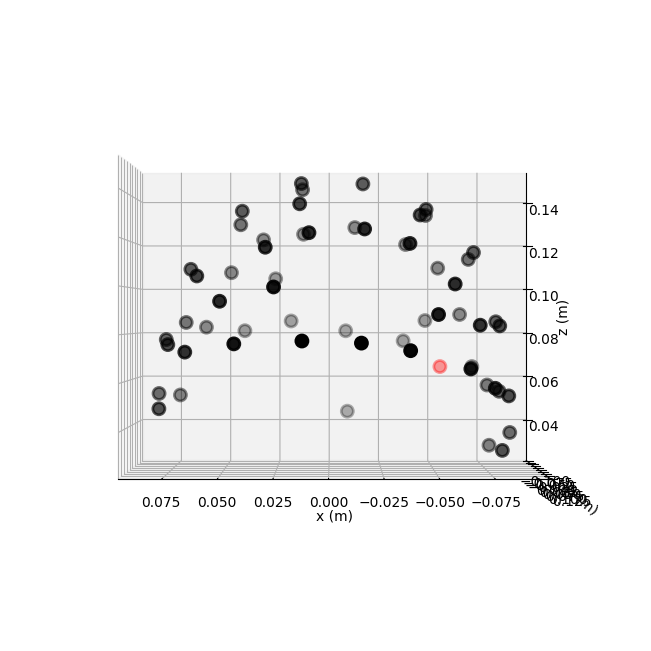

In [5]:
#show channel locations
raw.plot_sensors(show_names=True)
fig = raw.plot_sensors("3d")

Using matplotlib as 2D backend.


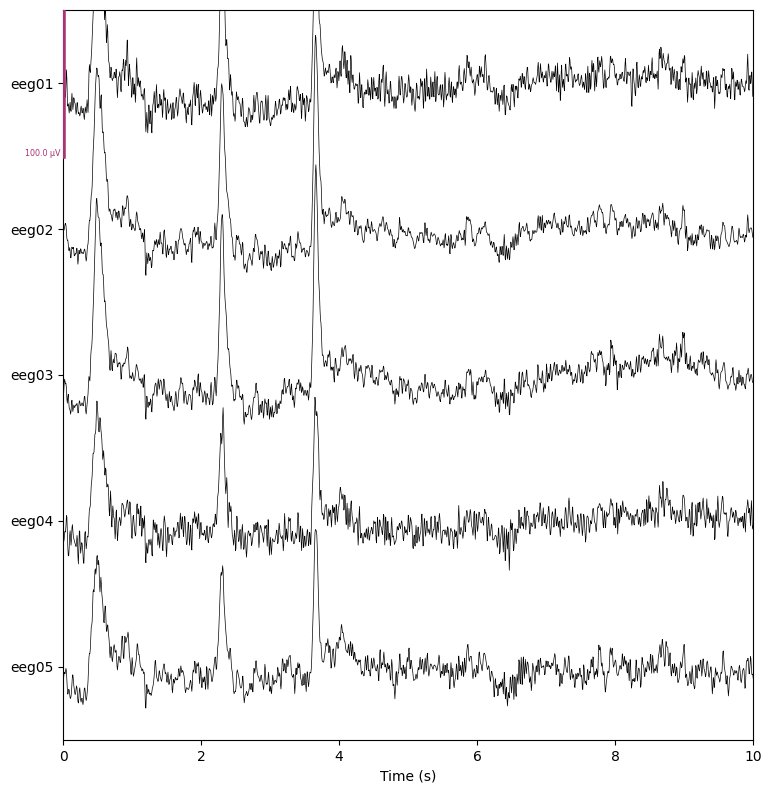

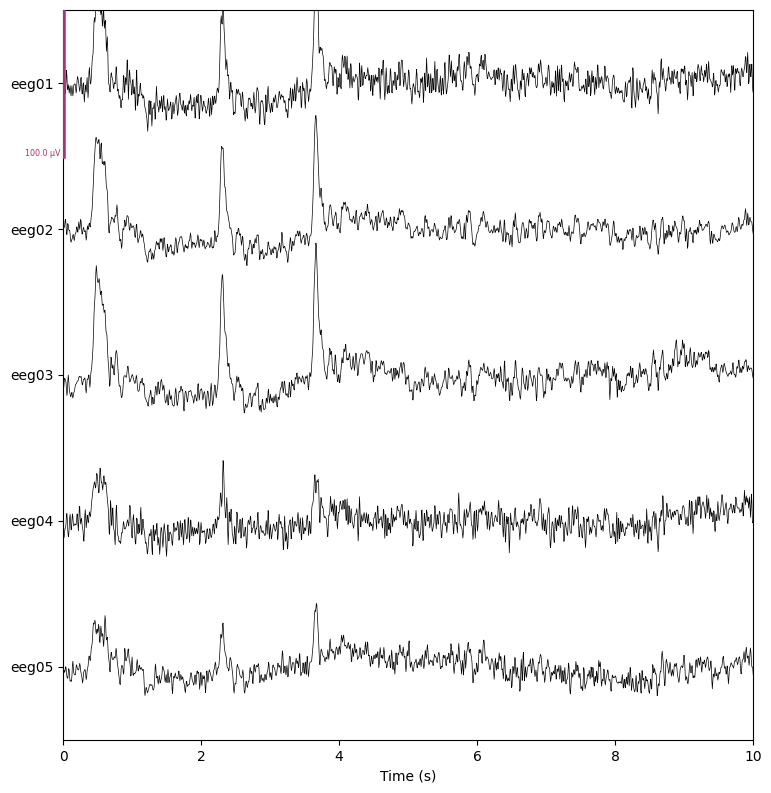

In [6]:
#see what it looked like before setting reference
for proj in (False, True):
    with mne.viz.use_browser_backend("matplotlib"):
        fig = raw.plot(
            n_channels=5, proj=proj, scalings=dict(eeg=50e-6), show_scrollbars=False
        )
    fig.subplots_adjust(top=0.9)  # make room for title
    ref = "Average" if proj else "No"
    fig.suptitle(f"{ref} reference", size="xx-large", weight="bold")

In [7]:
raw.filter(l_freq=0.1, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4957 samples (33.013 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<Raw | sample_audvis_filt-0-40_raw.fif, 61 x 13515 (90.0 s), ~9.2 MB, data loaded>

In [8]:
#events codes
np.unique(events[:, -1])

array([ 1,  2,  3,  4,  5, 32])

In [94]:
len(events), len(epochs)

(132, 114)

Not setting metadata
132 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 132 events and 151 original time points ...
1 bad epochs dropped
You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


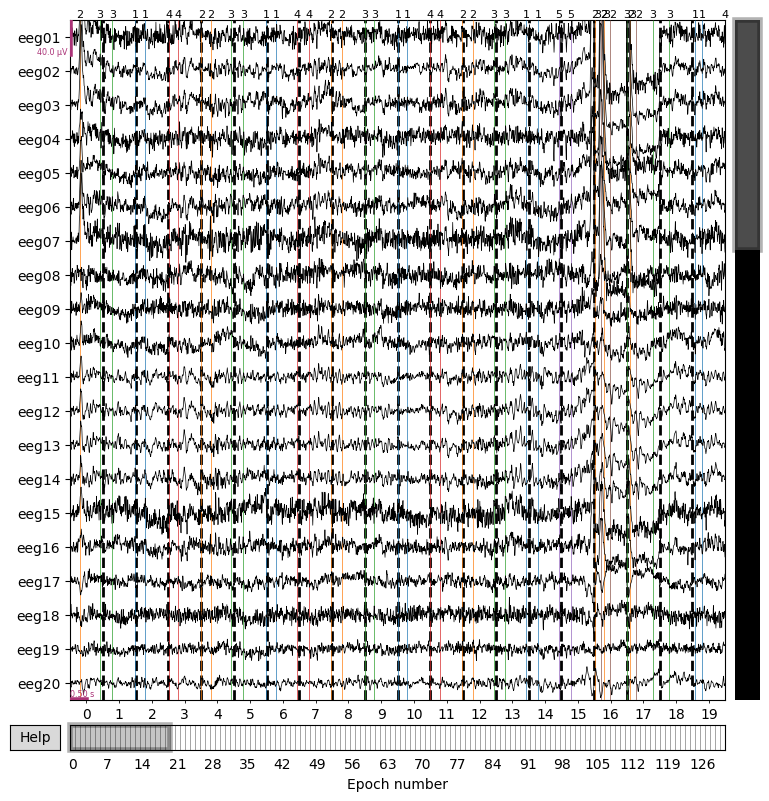

In [9]:
# rename events and construct epochs using intervals around each time event
event_dict = {
    "auditory/left": 1,
    "auditory/right": 2,
    "visual/left": 3,
    "visual/right": 4,
    "face": 5,
    "buttonpress": 32,
}

epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.3, tmax=0.7, preload=True)
fig = epochs.plot(events=events)

In [10]:
#reject epochs if a channel amplitude exceeds max value
reject_criteria = dict(eeg=100e-6, eog=200e-6)  # 100 µV, 200 µV
epochs.drop_bad(reject=reject_criteria)

    Rejecting  epoch based on EEG : ['eeg03']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg03']
    Rejecting  epoch based on EEG : ['eeg25']
    Rejecting  epoch based on EEG : ['e

<Epochs | 114 events (all good), -0.3 – 0.699 s (baseline -0.3 – 0 s), ~11.0 MB, data loaded,
 'auditory/left': 25
 'auditory/right': 27
 'visual/left': 28
 'visual/right': 25
 'face': 5
 'buttonpress': 4>

In [22]:
epochs["auditory/left"]

<Epochs | 25 events (all good), -0.3 – 0.699 s (baseline -0.3 – 0 s), ~4.7 MB, data loaded,
 'auditory/left': 25>

In [11]:
#get the evoked responses we care about by filtering events and averaging epochs
l_aud = epochs["auditory/left"].average()
l_vis = epochs["visual/left"].average()

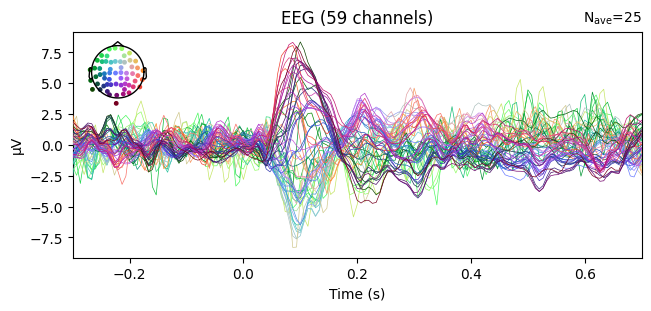

In [20]:
fig1 = l_aud.plot();
# fig2 = l_vis.plot(spatial_colors=True);

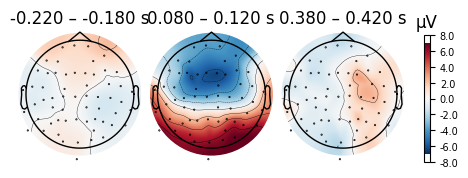

In [21]:
#display topomaps of the average evoked potential in 50 ms time windows centered at -200 ms, 100 ms, and 400 ms.
l_aud.plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05);

Projections have already been applied. Setting proj attribute to True.


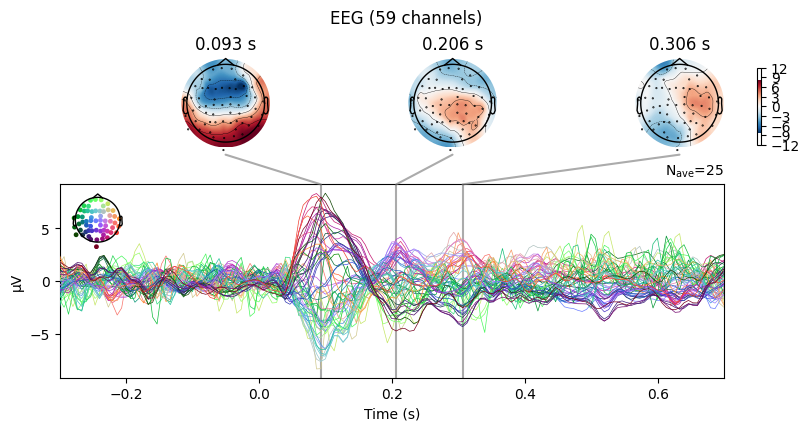

In [14]:
#see topomapson peak points together with butterflies plots 
l_aud.plot_joint();

In [15]:
def segment(ts, npeaks=3):
    '''
    define cut points of time series from its peaks and local minima values
    ToDo: exclude forbidden min and max values according to low ratio horizontal_dist/vertical_distance
    '''
    
    #minima
    min_idx = argrelextrema(ts, np.less)

    #peaks - choose 3 of them 
    max_idx = argrelextrema(ts, np.greater) #all peak candidates idx
    max_idx = np.argsort(ts)[np.isin(np.argsort(ts), max_idx)] #peaks idx sorted by ts value - the first one has the lowest ts value amongst the peak candidates 
    max_idx = max_idx[-npeaks:] #select how many peaks to consider 
    max_idx.sort() #sort by ascending index 

    #identify minima repair for each interval [begin,peak[ , [peak,peak[, [peak,end[
    min_repair_list = []
    cut_point_list = []
    id_left = 0
    for peak_id in max_idx:
        #locate local minima within peaks intervals - ""min_repair" is their mean value
        min_repair = (ts[id_left:peak_id][np.isin(np.arange(id_left,peak_id), min_idx)]).mean()
        min_repair_list.append(min_repair)

        #identify, for each peak value at the right, the closest minima id at its left that is less than minima repair
        #(cut at the time series index where its value at left of the peak is less than min_repair)
        cut_point = np.where(ts[id_left:peak_id]<=min_repair)[0][-1] + id_left #"+id_left" is to adjust the time series subinterval id to global time series id
        cut_point_list.append(cut_point)

        #iterate the pointer
        id_left = peak_id
        
    #last cut point should be defined at the right of the last peak
    min_repair = (ts[id_left:][np.isin(np.arange(id_left,len(ts)), min_idx)]).mean()
    cut_point = np.where(ts[id_left:]<=min_repair)[0][0] + id_left
    cut_point_list.append(cut_point)
    
    return max_idx, np.array(cut_point_list)

In [16]:
def img_idx_plot(cut_points, len_max, num_spatial_patterns = 4):
    '''
    define *num_spatial_patterns equally spaced points between cut_points of a time series of length=len_max
    '''
    #num_spatial_pattern is the number of spatial pattern plots per interval
    
    img_idx = [0]
    left_id = 0
    for cut_id in (list(cut_points)+[len_max-1]):
        img_idx_section = [int(np.floor((cut_id-left_id)*(i+1)/num_spatial_patterns)) + left_id for i in range(num_spatial_patterns)]
        img_idx = img_idx + img_idx_section
        left_id = cut_id
    
    img_idx = np.array(img_idx)
    return img_idx



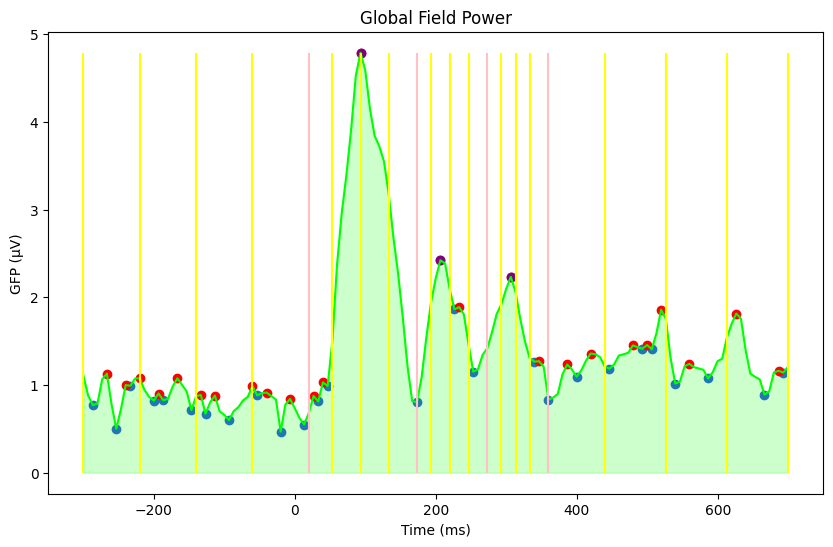

In [17]:
# Calculate Global Field Power and plot it with reference points
gfp = l_aud.data.std(axis=0, ddof=0)

min_idx = argrelextrema(gfp, np.less)
max_idx = argrelextrema(gfp, np.greater)

peak_idx, cut_points = segment(gfp, npeaks=3)

num_spat_pat = 4 #number of spatial patterns to plot (including cut point at right)
img_idx = img_idx_plot(cut_points, len(gfp), num_spat_pat)

# Visualize GFP
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(l_aud.times * 1000, gfp * 1e6, color="lime")
ax.fill_between(l_aud.times * 1000, gfp * 1e6, color="lime", alpha=0.2)
ax.set(xlabel="Time (ms)", ylabel="GFP (µV)", title="Global Field Power")
ax.scatter(l_aud.times[min_idx[0]]*1000, gfp[min_idx[0]]* 1e6, label="minima")
ax.scatter(l_aud.times[max_idx[0]]*1000, gfp[max_idx[0]]* 1e6, label="maxima", color = "r")
ax.scatter(l_aud.times[peak_idx]*1000, gfp[peak_idx]* 1e6, label="peaks", color = "purple")
ax.vlines(l_aud.times[img_idx]*1000,0, gfp.max()*1e6, label="img_idx", color = "yellow")
ax.vlines(l_aud.times[cut_points]*1000,0, gfp.max()*1e6, label="minima", color = "pink")

# ax.scatter(l_aud.times[min_repair]*1000, gfp[min_repair]* 1e6, label="minima", color = "pink")

There are 5 sections to be visualized (up to sec=4) - each section corresponds to the region between border and/or peaks.


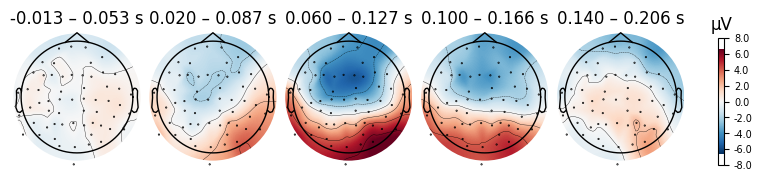

In [60]:
#display topomaps of the average evoked potential in 30 ms (average=0.03) time windows centered at the yellow and pink bars
print("There are {} sections to be visualized (up to sec={}) - each section corresponds to the region between border and/or peaks.".format(len(cut_points)+1,len(cut_points)))
sec_num = 1
spat_pat_times = l_aud.times[img_idx[sec_num*num_spat_pat:sec_num*num_spat_pat+num_spat_pat+1]]
window_duration = np.diff(spat_pat_times).mean()*2
l_aud.plot_topomap(times= spat_pat_times, average=window_duration); #space between each samples is of 6,668ms

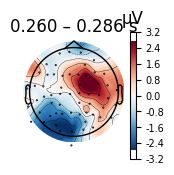

In [53]:
#plot using local scale
sec_num = 3
spat_pat_times = l_aud.times[img_idx[sec_num*num_spat_pat:sec_num*num_spat_pat+num_spat_pat+1]]

i = 0 #from 0 to num_spatial_patterns
l_aud.plot_topomap(times= spat_pat_times[i], average=0.03); #space between each samples is of 6,668ms

Projections have already been applied. Setting proj attribute to True.


/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/mne/viz/evoked.py:235: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  axis.get_figure().canvas.draw()


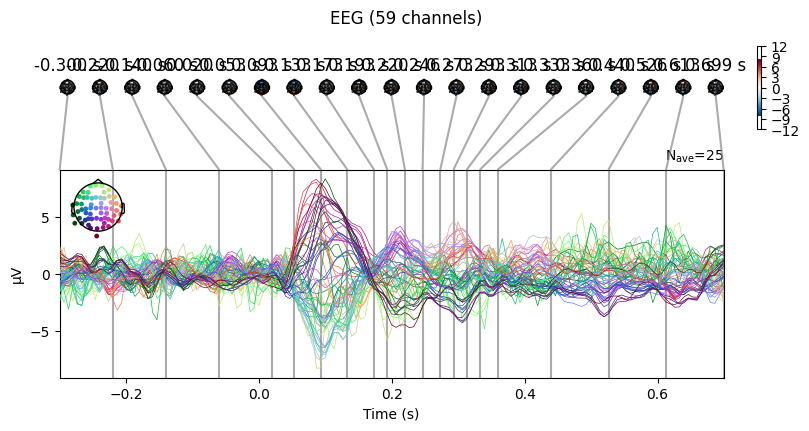

In [19]:
l_aud.plot_joint(times = l_aud.times[img_idx]);